# Pre-defined Circuits

The Qiskit includes a library of popular circuits to use as building blocks in you programs. Apart from circuits using standard gates, there are N-local circuits, date-encoding circuits, time-evolution ciruits and so on. In this file, we focus on some of the popular circuits.

## N-local Circuits

N-local circuits provides a parametrized quantum circuit to use as an ansatz in a broad set of variational quantum algorithms. These circuits alternate layers of single-qubit rotation gates with layers of multi-qubit entangling gates. 

N-local circuit = [local gate layer + entanglement layer] * N 

There are many different built-in N-local circuits. The simplest one is 

n_local(num_qubits, rot_blocks (rotation gate), ent_blocks (entanglemnt gate), entanglement_type, reps(N))

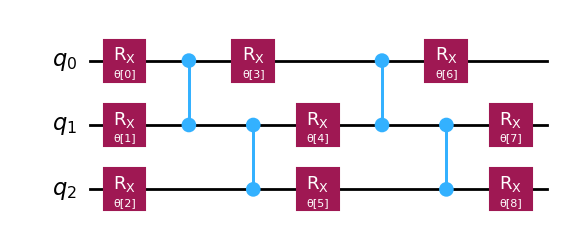

In [5]:
from qiskit.circuit.library import n_local

twolocal = n_local(3,"rx","cz","linear", reps =2)
twolocal.draw("mpl")

There are other N-local circuits depending on type of problem dealing with such as 

1. efficient_su2() - for hardware-efficient SU(2) 2-local circuit

2. qaoa_ansatz() -

3. hamiltonian_variational_ansatz() - 

## Data encoding and preparation circuits

## Time-evolution circuits

These circuits simulate a quantum state evolving in time. Some of them are PauliEvolutionGate, HamiltonianGate, and so on.

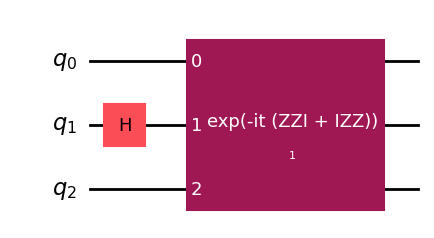

In [19]:
#PauliEvolutionGate: time-evolution of an operator consisting of Pauli operators
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
 
 
# Prepare an initial state with a Hadamard on the middle qubit
state = QuantumCircuit(3)
state.h(1)
 
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
evolution = PauliEvolutionGate(hamiltonian, time=1)
 
# Evolve state by appending the evolution gate
state.compose(evolution, inplace=True)
 
state.draw("mpl")

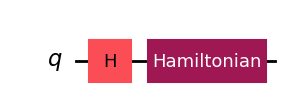

In [20]:
#HamiltonianGate: time-evolution of an Hamiltonian operator (data can be of matrix (hermitian))
#It forms as a gate
from qiskit.circuit.library import HamiltonianGate
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Pauli
import numpy as np

X = Pauli("X")
time = np.pi/2
op = X.to_matrix()

hgate = HamiltonianGate(op, time)
#hgate = Exp(-iX.pi/2) = -i X

qc = QuantumCircuit(1)
qc.h(0)
qc.append(hgate,[0])

qc.draw("mpl")

## Benchmarking and Complexity-theory circuits

## Arithmetic Circuits

These circuits perform classical arthimetic such as addition or multiplication.

1. Adders: HalfAdderGate,FullAdderGate (adding two n-qubit registers)

2. Multipliers: MultiplierGate (compute product of two n-qubit registers)

3. Amplitude functions: Approximates a function

4. Functional Pauli rotations:

5. Others: ExactreciprocalGate (finding inverse of a number)

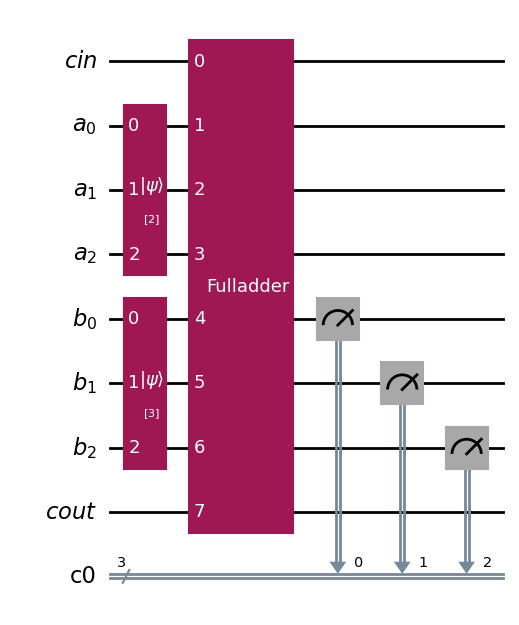

In [21]:
#FullAdderGate:
from qiskit.circuit.library import FullAdderGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
adder = FullAdderGate(3)  # Adder of 3-bit numbers
 
# Create the number A=2
reg_a = QuantumRegister(3, "a")
number_a = QuantumCircuit(reg_a)
number_a.initialize(2)  # Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(3, "b")
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 
# Create a circuit to hold everything, including a classical register for
# the result
qregs = [
    QuantumRegister(1, "cin"),
    QuantumRegister(3, "a"),
    QuantumRegister(3, "b"),
    QuantumRegister(1, "cout"),
]
reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = (
    circuit.compose(number_a, qubits=reg_a)
    .compose(number_b, qubits=reg_b)
    .compose(adder)
)
circuit.measure(reg_b, reg_result)
circuit.draw("mpl")

In [22]:
#ExactReciprocalGate: finding inverse of an integer